In [1]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()

f.load("file.fasta",enter)
for i in enter:
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName() 
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
for i in result:
   print(i.toString())

MDLNQR
K
EK
K
GQHVGCCGSR
TDLSADTVELIER
MDR
LAENQATASMSIVALPSSFQESNSSDR
CR
K
YCSSDEDSDTCIHGSANASTNATTNSSTNATTTASINVR
TSATTTASINVR
TSATTTESTNSNTNATTTESTNSSTNATTTASINVR
TSATTTESTNSSTNATTTASINVR
TSATTTESTNSSTNATTTASINVR
TSATTTESTNSNTNASTNATTNSSTNATTTASTNVR
TSATTNATTNSSTNATTTASTNVR
TSATTTASTNVR
TSATTTASINVR
TSATTTESINSSTNATTTESTNSNTSATTTESTDSNTNATTTASINVR
TSATTTESTNSNTSATTTESTDSNTSATTTASTNSSTNATTTASTNSSTNATTTESTNASAK
EDANK
DGNAEDNR
FHPVTDINK
ESYK
R
K
GSQMVFLER
K
K
LK
AQFPNTSENMNVLQFLGFR
SDEIK
HLFLYGIDIYFCPEGVFTQYGLCK
GCQK
MFGLCVCWAGQK
VSYR
R
IAWEALAVER
MLR
NDEEYK
EYLEDIEPYHGDPVGYLK
YFSVK
R
R
EIYSQIQR
NYAWYLAITR
R
R
ETISVLDSTR
GK
QGSQVFR
MSGR
QIK
ELYYK
VWSNLR
ESK
TEVLQYFLNWDEK
K
CR
EEWEAK
DDTVFVEALEK
VGVFQR
LR
SMTSAGLQGPQYVK
LQFSR
HHR
QLR
SR
YELSLGMHLR
DQLALGVTPSK
VPHWTAFLSMLIGLFYNK
TFR
QK
LEYLLEQISEMWLLPHWLDLANVEVLAADNTR
VPLYMLMVAVHK
ELDSDDVPDGR
FDIILLCR
DSSR
EVGE


In [2]:
from pyopenms import *
exp = MSExperiment()
MzMLFile().load("Fusion_180220_08.mzML", exp)
spectrum = exp.getSpectra()

In [3]:
from pyopenms import *
enter = []
seq =""
f=FASTAFile()
f.load("file.fasta",enter)
for i in enter :
    seq=seq+i.sequence
dig = ProteaseDigestion()
dig.getEnzymeName()
bsa = AASequence.fromString(seq)
result = []
dig.digest(bsa, result)
peptides = [AASequence.fromString(i.toString()) for i in result]

for peptide in peptides:
    tsg = TheoreticalSpectrumGenerator()
    theo_spectrum = MSSpectrum()
    spec1 = MSSpectrum()

    p = Param()
    p.setValue("add_b_ions", "true")
    p.setValue("add_y_ions", "true")
    p.setValue("add_losses", "true")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 1) 
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
        print(ion.decode(), "is generated at m/z", peak.getMZ())

Spectrum 1 of MDLNQR has 31 peaks.
b2-H2O1+ is generated at m/z 98.02365556247099
y1-C1H2N1O1+ is generated at m/z 131.10531384957102
y1-C1H2N2+ is generated at m/z 133.097154849571
y1-H3N1+ is generated at m/z 158.092403817671
y1+ is generated at m/z 175.118952913371
b3-H2O1+ is generated at m/z 211.107719913371
b2+ is generated at m/z 247.07470564337098
y2-C1H2N1O1+ is generated at m/z 259.1638921047711
y2-C1H2N2+ is generated at m/z 261.15573310477106
y2-H3N1+ is generated at m/z 286.1509820728711
y2+ is generated at m/z 303.1775311685711
b4-H2O1+ is generated at m/z 325.150648104771
b4-H3N1+ is generated at m/z 326.13466407287103
b3+ is generated at m/z 360.158769994271
y3-C1H2N1O1+ is generated at m/z 373.2068202961711
y3-C1H2N2+ is generated at m/z 375.19866129617105
y3-H3N1+ is generated at m/z 400.1939102642711
y3+ is generated at m/z 417.2204593599711
b5-H2O1+ is generated at m/z 453.209226359971
b5-H3N1+ is generated at m/z 454.19324232807105
b4+ is generated at m/z 474.20169

In [4]:
for i in range(0,1):
    alignment =[]
    matchpeaks =[]
    observed_spectrum = spectrum[i]
    tsg = TheoreticalSpectrumGenerator()
    spa = SpectrumAlignment()
    p = spa.getParameters()
    p.setValue("tolerance", 0.5)
    p.setValue("is_relative_tolerance", "false")
    spa.setParameters(p)
    for j in range(len(result)):
        theo_spectrum = MSSpectrum()
        p = spa.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(theo_spectrum, result[j], 1, 2)
        alignment =[]
        spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)
        matchpeaks.append(len(alignment))
    print("Number of matched peaks: " + str(max(matchpeaks)))
    print("ion\ttheo. m/z\tobserved m/z")
    theo_spectrum = MSSpectrum()
    tsg.getSpectrum(theo_spectrum, result[matchpeaks.index(max(matchpeaks))], 1 , 2)
    spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)
    for theo_idx, obs_idx in alignment:
       ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
       ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
       print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(observed_spectrum[obs_idx].getMZ()))
 
    theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
    for theo_idx, obs_idx in alignment:
       theo_mz.append(theo_spectrum[theo_idx].getMZ())
       theo_int.append(theo_spectrum[theo_idx].getIntensity())
       obs_mz.append(observed_spectrum[obs_idx].getMZ())
       obs_int.append(observed_spectrum[obs_idx].getIntensity())
  
        

Number of matched peaks: 29
ion	theo. m/z	observed m/z
y3+	1	388.23029539187104	388.1358253476571
b7++	2	400.62380398572094	400.4395040896284
y8++	2	431.24306898757095	431.2150190482127
b4+	1	441.14384896237095	441.38595771866386
b8++	2	444.13981856547093	443.94443500840976
y9++	2	481.7669085992209	481.82453342352954
y4+	1	501.31435974277105	500.87840745435085
b9++	2	501.6532906452209	501.84861999883304
y10++	2	517.2854656789709	517.1708849496279
b10++	2	552.1771302568709	552.1858039544543
b5+	1	556.1707931218709	555.8431163408306
y11++	2	574.306929774671	574.3008447799627
y5+	1	588.346388902271	588.842912278756
y12++	2	624.830769386321	624.9338580593726
b12++	2	660.2237548770709	660.2248845816847
y13++	2	668.346783966071	668.1973067738413
b6+	1	685.213387345171	685.212985421832
y14++	2	711.8627985458211	711.8256396169587
b13++	2	728.7532109887209	729.1293633226653
b14++	2	757.2639430365708	757.2650022807351
y7+	1	760.4311822850709	760.2403700128895
y8+	1	861.4788615083709	861.76461270

In [10]:
print(str(result[matchpeaks.index(max(matchpeaks))]))

YCSSDEDSDTCIHGSANASTNATTNSSTNATTTASINVR


In [6]:
print(len(spectrum)) 

46760


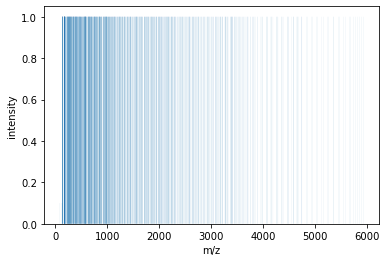

In [7]:
import numpy as np
from matplotlib import pyplot as plt
for r in result:
    peptide = AASequence.fromString(r.toString())
    tsg.getSpectrum(spec1,r,1,1)
plt.bar(spec1.get_peaks()[0], spec1.get_peaks()[1], snap=False) 
plt.xlabel("m/z")
plt.ylabel("intensity")
plt.show()

376.2240176511119
1494.9302679882737


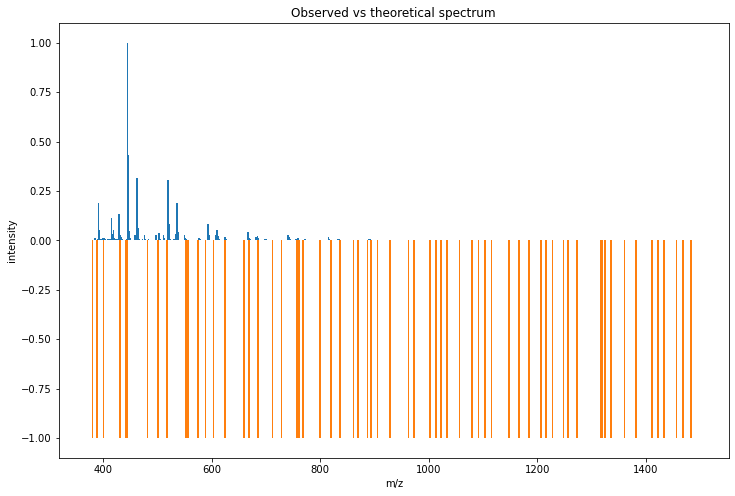

In [8]:
import numpy as np
from matplotlib import pyplot as plt
def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / max(obs_int) for element in obs_int] 
    theo_int = [element * -1 for element in theo_int] 
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')

obs_mz, obs_int = observed_spectrum.get_peaks()
print(min(obs_mz)) 
print(max(obs_mz)) 


theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= min(obs_mz) and mz <= max(obs_mz):
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)


Number of matched peaks: 29
ion	theo. m/z	observed m/z
y3+	1	388.23029539187104	388.1358253476571
b7++	2	400.62380398572094	400.4395040896284
y8++	2	431.24306898757095	431.2150190482127
b4+	1	441.14384896237095	441.38595771866386
b8++	2	444.13981856547093	443.94443500840976
y9++	2	481.7669085992209	481.82453342352954
y4+	1	501.31435974277105	500.87840745435085
b9++	2	501.6532906452209	501.84861999883304
y10++	2	517.2854656789709	517.1708849496279
b10++	2	552.1771302568709	552.1858039544543
b5+	1	556.1707931218709	555.8431163408306
y11++	2	574.306929774671	574.3008447799627
y5+	1	588.346388902271	588.842912278756
y12++	2	624.830769386321	624.9338580593726
b12++	2	660.2237548770709	660.2248845816847
y13++	2	668.346783966071	668.1973067738413
b6+	1	685.213387345171	685.212985421832
y14++	2	711.8627985458211	711.8256396169587
b13++	2	728.7532109887209	729.1293633226653
b14++	2	757.2639430365708	757.2650022807351
y7+	1	760.4311822850709	760.2403700128895
y8+	1	861.4788615083709	861.76461270

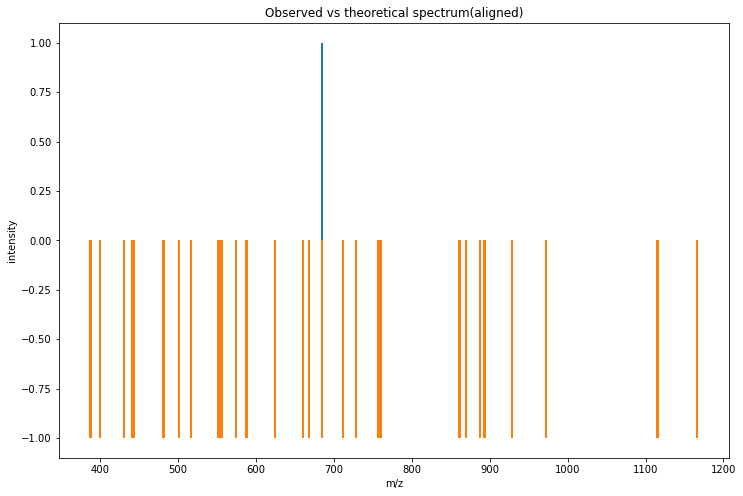

In [9]:
for i in range(0,1):
    alignment =[]
    matchpeaks =[]
    observed_spectrum = spectrum[i]
    tsg = TheoreticalSpectrumGenerator()
    spa = SpectrumAlignment()
    p = spa.getParameters()
    p.setValue("tolerance", 0.5)
    p.setValue("is_relative_tolerance", "false")
    spa.setParameters(p)
    for j in range(len(result)):
        theo_spectrum = MSSpectrum()
        p = spa.getParameters()
        p.setValue("add_y_ions", "true")
        p.setValue("add_b_ions", "true")
        p.setValue("add_metainfo", "true")
        tsg.setParameters(p)
        tsg.getSpectrum(theo_spectrum, result[j], 1, 2)
        alignment =[]
        spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)
        matchpeaks.append(len(alignment))
    print("Number of matched peaks: " + str(max(matchpeaks)))
    print("ion\ttheo. m/z\tobserved m/z")
    theo_spectrum = MSSpectrum()
    tsg.getSpectrum(theo_spectrum, result[matchpeaks.index(max(matchpeaks))], 1 , 2)
    spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)
    for theo_idx, obs_idx in alignment:
       ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
       ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
       print(ion_name + "\t" + str(ion_charge) + "\t"
          + str(theo_spectrum[theo_idx].getMZ())
          + "\t" + str(observed_spectrum[obs_idx].getMZ()))
 
    theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
    for theo_idx, obs_idx in alignment:
       theo_mz.append(theo_spectrum[theo_idx].getMZ())
       theo_int.append(theo_spectrum[theo_idx].getIntensity())
       obs_mz.append(observed_spectrum[obs_idx].getMZ())
       obs_int.append(observed_spectrum[obs_idx].getIntensity())
    title = 'Observed vs theoretical spectrum(aligned)'
    mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)
